# Analysis of stock value of YPF
## Version: 1
## Author: Alexis Biancotti
## Date: 08/2020

## Imports


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit
import functools

## Data Preparation

In [8]:
data_ypf = pd.read_csv('YPFD.BA.csv')

# I take only the values from 2017 
data_ypf['Date'] = pd.to_datetime(data_ypf.Date)

data_ypf.set_index('Date',inplace=True)

data_ypf = data_ypf.loc['2017-01-01':]

# I drop the columns that i dont need in the model
data_ypf  = data_ypf.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])

# result
data_ypf.tail() 

,Close
Date,
2020-06-30,602.099976
2020-07-01,623.049988
2020-07-02,633.200012
2020-07-03,627.900024
2020-07-06,660.000000


## Data Exploration

In [9]:
# I start looking for the basic statistics
print(data_ypf.describe())

            Close
count  855.000000
mean   519.788656
std    143.899297
min    235.600006
25%    394.725006
50%    484.350006
75%    620.875000
max    873.750000


## Visualising Data

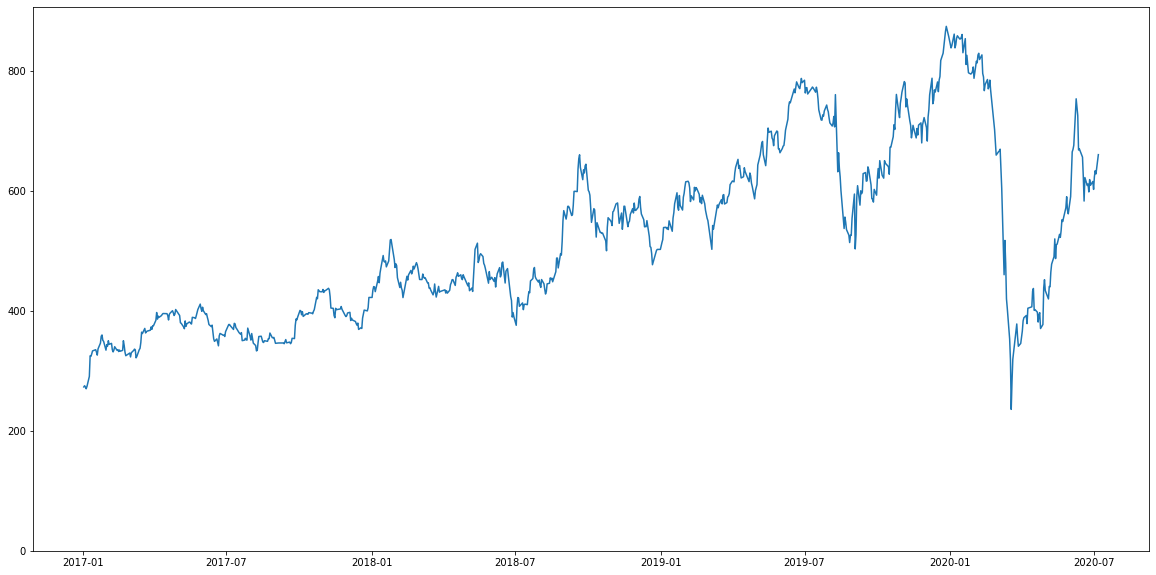

In [10]:
plt.figure(figsize=(20,10))
plt.plot(data_ypf.index, data_ypf.Close)

plt.ylim(0,)

plt.show()

## Linear Regression

In [11]:
# I split the data into test and training sets 
ypf_train_close   = data_ypf.Close.loc['2019-07-01':'2020-05-15']
ypf_train_close_x = np.arange(0, len(ypf_train_close), step=1)

ypf_test_close  = data_ypf.Close.loc['2020-05-15':]
ypf_test_close_x = len(ypf_train_close_x) + np.arange(0, len(ypf_test_close), step=1)

In [12]:
# I run the regression forcing the line to pass into the last value
forced_point_x = ypf_train_close_x[-1]
forced_point_y = ypf_train_close[-1]

def model(x, m, xf, yf):
  return m*(x-xf)+yf

partial_model = functools.partial(model, xf=forced_point_x, yf=forced_point_y)
p0 = [forced_point_y/forced_point_x]

best_fit, covar = curve_fit(partial_model, ypf_train_close_x, ypf_train_close, p0=p0)
print("Best fit:", best_fit)
y_fit = model(ypf_train_close_x, best_fit[0], forced_point_x, forced_point_y )
intercept = model(0, best_fit[0], forced_point_x, forced_point_y )

Best fit: [-1.23654898]


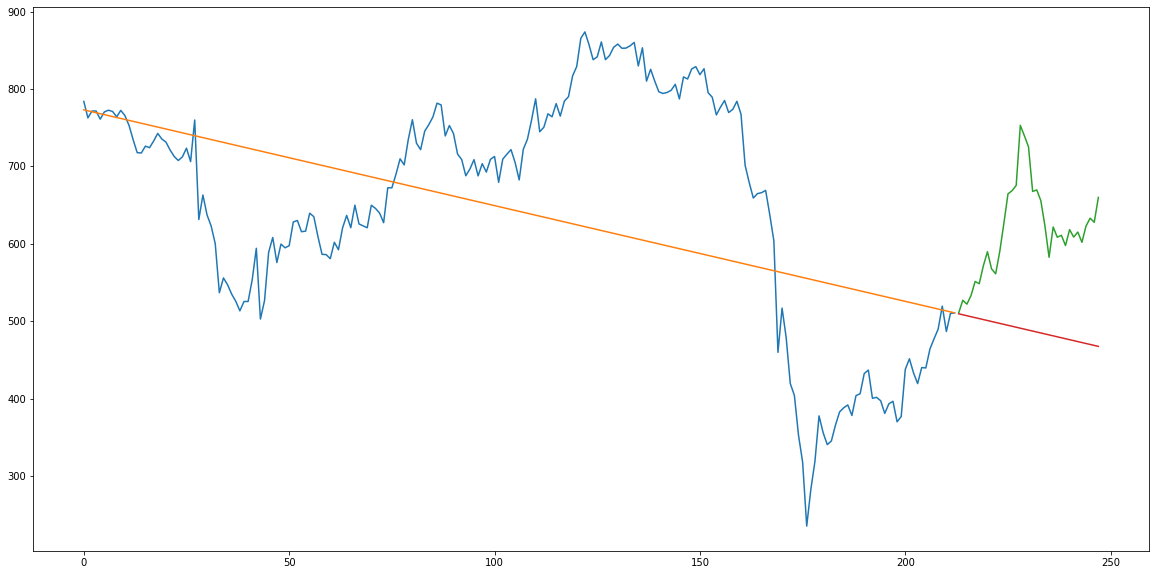

In [15]:
plt.figure(figsize=(20,10))

# graph of training data and regression
plt.plot(ypf_train_close_x, ypf_train_close)
plt.plot(ypf_train_close_x, y_fit)

# graph of testing data and regression
plt.plot(ypf_test_close_x, ypf_test_close)
plt.plot(ypf_test_close_x, ypf_test_close_x * best_fit[0] + intercept)

plt.show()